<a href="https://colab.research.google.com/github/aalr007/iayaa-Equipo-19/blob/main/Tutorial_Falconista_para_Jobishtas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### **Ejemplo Proyecto ML**

En este tutorial veremos como llevar un proyecto de ML desde la imputación de los datos hasta el entrenamiento de un modelo, uniendo todo lo aprendido hasta el momento. 

El tutorial puede servir para la actividad #7 de la materia de IA & AA. Importante notar que esto es una guía para darte una idea de cómo abordar la actividad 7 y no pretende ser la solución de la tarea.

Dicho lo anterior, comencemos.

* Nota 1: profesores, tutores, facilitadores, etc: pueden usar este recurso, pero favor de citar con formato APA.
* Nota 2: Pueden encontrar una versión electrónica en: https://github.com/rafaeljosem/tutoriales-mna

##### **1. Importando los datos**

Empecemos importando los datos. Para este tutorial vamos a utilizar el mismo dataset de la actividad 7 por conveniencia (me es más fácil hacer el tutorial sin preocuparme de qué datos buscar). Lo anterior no significa que debas copiar estos pasos tal cual para la tarea. Recuerda que este tutorial pretende ser una guía y no una solución.

Ahora importemos los datos:

In [ ]:
import pandas as pd

df = pd.read_csv("/content/data/actividad-7/SouthGermanCredit.asc", sep=" ") #Este archivo no está separado por comas, sino con espacios en blanco. Por eso el " "
df.head()

,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


De lo anterior no hay mucho que decir, puesto que es lo que hemos estado haciendo desde el primer día. Simplemente importamos la data y leimos los primeros 5 registros.

No se tú, pero yo de alemán no se nada. Así que vamos a traducir las columnas primero:

In [ ]:
df_copy = df.copy() # copiamos el DF por si metemos la pata

#Fíjate que los nombres en la lista están en el mismo orden de las columnas. Por ejm, laukfont es status, laufzeit es duration, etc
translated_cols = ["status", "duration", "credit_history", "purpose", "amount", "savings", 
                   "employment_duration", "installment_rate", "personal_status_sex", 
                   "other_debtors", "present_residence", "property", "age", "other_installment_plans", "housing",
                   "number_credits", "job", "people_liable", "telephone", "foreign_worker", "credit_risk"]

#Aquí decimos que sustituya los nombres de las columnas por la lista de nombres definida arriba
df_copy.columns = translated_cols

Para fines de este ejemplo solo utilizaremos 6 variables: 3 numéricas y 3 categóricas. Ten en cuenta que en el ejercicio #7 te mencionan que hay varios tipos de variables (categóricas, ordinales, binarias y continuas), sin embargo, para fines de este ejemplo solo las diviremos en numéricas y categóricas


In [ ]:
cat_vars = ["status", "job", "people_liable"]
num_vars = ["age", "amount", "duration"]

Listo, ahí están las columnas que estaremos utilizando de nuestro conjunto de datos. Ahora vamos a crear nuestro conjunto de entrenamiento y prueba

In [ ]:
from sklearn.model_selection import train_test_split


Xtrain, Xtest, Ytrain, Ytest = train_test_split(df_copy[cat_vars + num_vars], df_copy[["credit_risk"]], train_size=0.8)

Ok ok ok... te estás preguntando que qué fue lo que hice. Bueno, empecemos explicando cada parte del código:

* train_test_split: Esta función seguro que ya la conoces. Lo único que hace es dividir el conjunto de datos en 2: una para entrenamiento y otra para prueba. El train_size = 0.8 lo que dice es que yo quiero que el conjunto para entrenar mi modelo sea de 80% del total de los datos. El restante 20% lo usaré para probar el modelo.

* df_copy[cat_vars + num_vars]: Esto hace dos cosas: La primera es que cat_vars + num_vars une los valores de ambas listas. Es decir, esta operación resultará en una lista con 6 elementos: status, job, people_liable, age, etc. El término técnico de esta operación es "concatenar". En otras palabras, estamos concatenando dos listas. Lo segundo que hace es decirle al datagrame que me devuelva solamente esas 6 columnas, que son las variables que finalmente estaremos utilizando.
  
* df_copy[["credit_risk"]] le dice al dataframe que me devuelva esa columna solamente. credit_risk es nuestra variable de respuesta (Y). Es decir, esta es la variable que queremos estimar.
  
* Fíjate el orden de los argumentos en train_test_split. Primero pongo las Xs (cat_vars + num_vars) y luego coloco las Ys (credit_risk). El resultado que retornará la función sigue ese mismo orden: primero retorna las Xs (Xtrain, Xtest) y luego las Ys (Ytrain, Ytest). Es el mismo orden como cuando nos aprendimos las coordenadas (x,y).
  
* Por último, importante notar que toda la manipulación de los datos (análisis, imputación, etc) se hará sobre el conjunto Xtrain. Esto para evitar el "data leakage", el cual se produciría si utilizáramos todo el conjunto de datos en vez de la partición para entrenamiento. Por tanto, el Xtest y Ytest los usaremos ya al final.

Listo, ya tenemos los pares de entrenamiento y prueba. Ahora pasemos a explorar la data.


##### **1. Explorando los datos**

Vamos a sentarnos con los datos y conversar con ellos. Queremos que nos digan como se sienten, cuáles son sus hobbies, quién es su favorito, si Jobbish o Falcon, qué esperan de la vida. En fin, tenemos que conocernos antes de iniciar una relación con ellos. Así que veamos que nos dicen.

Primero veamos los tipos de cada columna

In [ ]:
#El método info te da un resumen de la estructura de tus datos. Te dice cuántas columnas ahí, cuántos datos hay, qué tipo tiene cada columna, etc.
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 477 to 747
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   status         800 non-null    int64
 1   job            800 non-null    int64
 2   people_liable  800 non-null    int64
 3   age            800 non-null    int64
 4   amount         800 non-null    int64
 5   duration       800 non-null    int64
dtypes: int64(6)
memory usage: 43.8 KB


Aquí vemos que las variables status, job y people_liable son categóricas y pandas las está leyendo como numéricas. Esto porque las columnas contienen números que representan categorías, y pandas eso no lo sabe. Debemos tomar eso en cuenta al momento de analizar los datos, lo cual haremos ahora.

In [ ]:
#El método describe de pandas te tira un resumen estadístico de cada columna numérica
Xtrain[num_vars].describe()


,age,amount,duration
count,800.000000,800.000000,800.000000
mean,35.863750,3196.107500,20.741250
std,11.531757,2685.298768,11.864981
min,19.000000,250.000000,4.000000
25%,27.000000,1363.250000,12.000000
50%,34.000000,2286.000000,18.000000
75%,42.000000,3914.250000,24.000000
max,75.000000,15672.000000,72.000000


Fíjate que solo le dijimos a pandas que nos de el resumen estadístico solo para las variables age, amount y duration. Esto porque sacar una media o una desv std no hace sentido para datos categóricos.

Viendo la data, podemos observar que las escalas son muy diferentes. Fíjate que para la variable "age", el mínimo es 19 y máximo 75, mientras que para "amount" el mínimo es 279 y el máximo 18,434. Por otro lado, "duration" tiene un mínimo de 4 y un máximo de 72.

Lo anterior significa que en algún momento tendremos que escalar estos datos, ya que sus rangos son muy diferentes entre uno y otro, y esto puede afectar el desempeño del modelo.

Ahora, construyamos un diagrama de caja para verlos más de cerca:

Diagrama para age


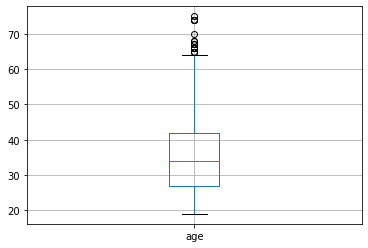



Diagrama para amount


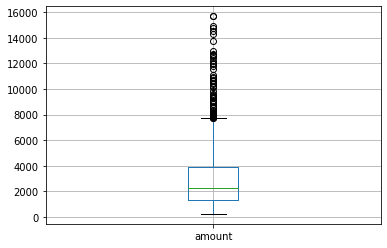



Diagrama para duration


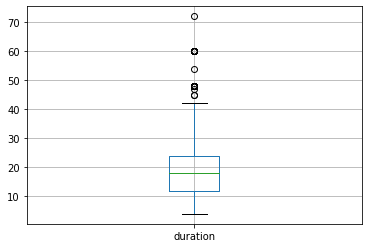

In [ ]:
import matplotlib.pyplot as plt

for var in num_vars: #Iteramos sobre cada variable numérica para así construir un boxplot por variable
    print(f"Diagrama para {var}") 
    Xtrain[[var]].boxplot()  #Le decimos a pandas que construya el boxplot para cada variable
    plt.show() #Usamos esta función para "forzar" que se muestre el diagrama, de lo contrario solo aparecerá el último boxplot que se construyó.
    print("\n") #Damos enter para separar un poco los gráficos

Analicemos los boxplots, pero para eso debemos entender cómo se interpretan. Recomiendo que leas el tutorial de introducción a la estadística para repasar algunos conceptos que utilizaremos.

Bien, veamos la estructura del diagrama de caja:

![Boxplot](https://github.com/rafaeljosem/tutoriales-mna/blob/main/IA%20%26%20AA/images/boxplot-example.png?raw=1)

* La caja que ves en el diagrama representa un 50% de la información. Mientras más alargada es la caja, significa que mayor variación tendrán los datos. Esta información suele ser muy útil cuando comparas varios diagramas de caja. Visualmente te das cuenta de una vez cuál de todas las variables es la que mayor variabilidad tiene.

* Los bigotes representan el restante 50% de los datos. Mientras más grande los bigotes, significa que mayor es la variabilidad de esos datos. Por ejemplo, mira como el bigote de abajo es más pequeño al bigote de arriba. Esto significa que los datos por debajo del primer cuartil tienen menor variación que los datos por encima del tercer cuartil. En otras palabras, el extremo izquierdo de los datos es más consistente que el extremo derecho. Ya esto nos da un indicio de que la distribución tiene un sesgo positivo.

* Podemos notar presencia de valores atípicos en el extremo derecho de la distribución (arriba).
  
* Fíjate que alrededor del 75% de la información se encuentra debajo del 25 aproximadamente (el tercer cuartil). Esta información es útil para determinar el tipo de imputación a realizar. Por ejemplo, podemos ver que la mayoría de los datos se concentran entre 5 y 25 aproximadamente (bigote del extermo izquierdo hasta tercer cuartil). Esto significa que no hay tanta variación y podríamos sustituir por la media o mediana en caso de toparnos con datos vacíos. Ahora, si la caja fuera mucho más alargada (es decir, mayor variación), entonces tal vez sería mejor usar la mediana en vez de la media (de nuevo, recomiendo leer el tutorial de introducción a la estadística).
  
* ¿Cómo se si hay o no poca variación? Primero por el tamaño de la caja, como vimos arriba. Pero lo segundo es porque la mediana y la media tienen valores muy parecidos. Fíjate que en el diagrama la mediana se encuentra cerca del 20. Si buscas arriba, en el resumen estadístico, verás que la media es 20.9. Si ambos valores se parecen, significa que hay poca variabilidad (por eso podría sustituir valores vacíos por cualquiera de las dos).


Listo, ya tienes tu badge en boxplots.

En conclusión, podemos ver que los tres datos están sesgados de manera positiva (esto significa que la mayoría de los datos se agrupan a la izquierda de la distribución, generando una "cola" larga hacia el lado derecho. Intenta graficando un histograma de entre 10-15 bins para que lo veas).

Ahora exploremos la variable de respuesta, es decir, los datos en Ytrain.

In [ ]:
#value_counts() lo que hace es contar la frecuencia de cada valor único. 
# Por ejemplo, cuantos 1s hay y cuantos 0s hay. 
# Si tuviésemos 100 números diferentes, pues haría lo mismo: cuantos 1s hay, cuantos 2s, cuantos 3s, etc.
Ytrain.value_counts()


credit_risk
1              563
0              237
dtype: int64

Recordemos que en ese dataset la intención es predecir si una persona es confiable o no para darle un crédito (por lo que estamos ante un problema de clasificación). Eso significa que el resultado de Ytrain es una variable categórica (específicamente del tipo binario), y no una variable numérica. Por tal razón, utilizamos la función "value_counts", en vez de describe, para ver simplemente las frecuencias y si estamos ante una clase balanceada o no.

De lo anterior nos podemos fijar que alrededor del 70% tienen una clasificación de 1 y el restante 30% una clasificación de cero. Ya con esto podemos ver que nuestra clase está desbalanceada y esta información será útil más adelante.

Si quieres ver la información anterior en porcentajes, solo tienes que hacer esto:

In [ ]:
Ytrain.value_counts() / len(Ytrain)

credit_risk
1              0.70375
0              0.29625
dtype: float64

##### **2. Limpieza de los datos**

Ahora definamos una estrategia para lidiar con los valores vacíos. Existen muchas, pero vamos enfocarnos en las más simples:

* Sustituir por la media o mediana: Esta estrategia es útil para los datos numéricos ya que no hace sentido calcular estos estadísticos para los categóricos. Como vimos arriba, sustituir por la media o mediana dependerá de que tanta variación exista en nuestros datos (pues queremos el valor que mejor represente a nuestro conjunto).
  
* Sustituir por moda o frecuencia: Esta estrategia la utilizaremos para valores categóricos. Es decir, si nos topamos con un valor vacío, entonces lo sustituimos con el que más se repita.
  
* Eliminar los datos: Esta estrategia podríamos usarla si una fila tiene muchos valores vacíos (por ejemplo, más de 3). La elección de mucho o poco dependerá bastante del conjunto de datos con el que estemos trabajando.

Para fines de este ejemplo, vamos a utilizar las estrategias de sustitución, pero recuerda que hay otras más que valen la pena explorar.

Comencemos primero sustituyendo los vacíos de los numéricos por la media o mediana. Para eso utilizaremos el SimpleImputer de Sklearn

In [ ]:
from sklearn.impute import SimpleImputer


num_imputer = SimpleImputer(strategy='mean')
num_imputed =  num_imputer.fit_transform(Xtrain[num_vars], Ytrain)

cat_imputer = SimpleImputer(strategy='most_frequent')
cat_imputed = cat_imputer.fit_transform(Xtrain[cat_vars], Ytrain)

#Vamos a imprimir un ejemplo de como se ven los datos
num_imputed

array([[  25., 3105.,   24.],
       [  29., 1193.,   24.],
       [  35., 3780.,   18.],
       ...,
       [  31., 4817.,   24.],
       [  36., 2872.,   24.],
       [  44., 5507.,   24.]])

Del paso anterior acabamos de imputar los datos, donde los numéricos vacíos serán sustituidos por la media (mean) y los categóricos vacíos serán sustituidos por la moda (most_frequent).

Fíjate como tuvimos que separar cada imputación según el tipo de variable, y debido a esto obtenemos los resultados imputados de manera separada también (y en formato de array, no en dataframe).

Hacerlo de esta manera es tedioso, principalmente si quieres seguir aplicando transformaciones en función del tipo de dato (categórico, numérico, etc). Imagínate que quieras escalar los numéricos, pues tendrás que aplicar el MinMaxScaler en otro paso, metiéndole el resultado del SimpleImputer al MinMax. 

Ahora imagínate que quieres normalizar los datos. Pues ahora tendrás que aplicar en otro paso un Normalizer y ponerle como entrada los resultados del MinMaxScaler, etc, etc, etc.

Fíjate como la cosa se va enredando a medida que vas añadiendo nuevos pasos. Por suerte, hay una solución para esto y son los Pipelines! 

![pied-piper](https://github.com/rafaeljosem/tutoriales-mna/blob/main/IA%20%26%20AA/images/memes/pied-piper.gif?raw=1)

Vamos a ver como funcionan.

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


cat_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy='most_frequent'))
])

num_pipeline = Pipeline(steps = [
    ("imputer", SimpleImputer(strategy='mean')),
     ("scaler", MinMaxScaler())
])

Tal vez estás diciendo "Pero igual tuviste que hacer dos pipelines para cada tipo de datos. No veo la diferencia". Aguanta un poco. Más adelante verás la ventaja de todo esto. Pero mientras tanto, vamos a ver que fue lo que hicimos arriba.

* Primero, fíjate como se definen los pipelines. Para esto creas un objeto del tipo Pipeline de la librería sklearn. Cuando creas el pipeline debes definir los pasos que quieres que este realice. Imagínate el pipeline como un conjunto de tareas que le quieres aplicar a un conjunto de datos, en un orden específico (el orden en como colocas los pasos importa).
  
* Cuando colocas los pasos, estos van dentro de una lista (por eso ves unos corchetes en steps = []). Dentro de la lista colocas los pasos en tuplas (que son los paréntesis). La secuencia es como sigue: (nombre_del_paso, transformador), donde nombre_del_paso es un nombre arbitrario que quieras darle (imputer, juan, pedro, falcon, jobish, etc) y el transformador es la acción que quieres realizar (imputar, escalar, etc).

* Por último, nota que definimos dos pipelines, uno para las numéricas y otro para los categorícos. Esto porque las transformaciones a realizar son diferentes según el tipo de datos. En el caso de las numéricas nota como definimos dos pasos: el imputer y el scaler, los cuales se ejecutarán en ese mismo orden.

Ok, suficiente con esto de los pipelines. Ahora veamos como unimos todo.

In [ ]:
from sklearn.compose import ColumnTransformer


transformer = ColumnTransformer(transformers=[
    ("cat", cat_pipeline, cat_vars),
    ("num", num_pipeline, num_vars)
]); 
#El punto y coma que ves al final solo funciona para Jupyter. Esto es para evitar que imprima algo en la consola. 
#Si se lo quito, a mi me aparece un diagrama de árbol con la información del transformador. 
#Como esa info no es relevante para lo que estamos viendo, prefiero que ni aparezca.

En el bloque anterior usamos el paso "ColumnTransformer" de sklearn. Veamos que pasó aquí:

* El ColumnTransformer funciona con una lógica similar al pipeline. Lo que hace es tomar los pipelines que definimos arriba y lo ponemos en una lista de la siguiente manera (nombre del transformador, transformador(en este caso pipeline), columnas a la que le aplicarás la transformación).

* La gran diferencia con el ColumnTransformer es que tu defines las variables o columnas a las cuales le quieres aplicar cierta transformación. Por ejemplo, mira que nosotros queremos aplicar el cat_pipeline solo a las categóricas, mientras que el num_pipeline solo a las numéricas. Es por eso que al final colocamos la lista cat_vars que contiene los nombres de las columnas categóricas para el paso "cat", así como la lista num_vars con los nombres de las variables numéricas para el paso "num". 

* El ColumnTransformer no solo acepta pipelines. En realidad acepta cualquier transformador. Por ejemplo, nosotros pudimos haber hecho lo siguiente también y nos ahorramos uno de los pipelines, ya que solo tenía un paso:

In [ ]:
transformer = ColumnTransformer(transformers=[
    ("cat", SimpleImputer(strategy='most_frequent'), cat_vars),
    ("num", num_pipeline, num_vars)
])

¿Listo para el truco final? Aquí vamos:

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np

final_pipe = Pipeline(steps = [
    ('optimus_prime', transformer),
    ('model', LogisticRegression()) 
])

final_pipe.fit(Xtrain, Ytrain.values.ravel());
#Nota: El Ytrain.values.ravel() es porque el modelo LogisticRegression tira la siguiente advertencia:
#"DataConversionWarning: A column-vector y was passed when a 1d array was expected. 
#Please change the shape of y to (n_samples, ), for example using ravel()"

Y aquí es donde está la gran ventaja de todo. Solo tuvimos que entrar el Xtrain y Ytrain una sola vez, sin tener que repetir el fit o fit_transform varias veces. Definimos los pasos que queremos aplicar y luego con un solo comando lo ejecutamos todo de una vez.

![WOW](https://github.com/rafaeljosem/tutoriales-mna/blob/main/IA%20%26%20AA/images/memes/exploding-brain.gif?raw=1)

Todos los pipelines, transformers, etc. se encargan de ejecutar cada paso en el orden en el que los colocamos y utilizando como entrada la salida de la última transformación.

##### **3. Entrenamiento del Modelo**

Posiblemente digas qué sentido tiene esta sección si ya entrenamos el modelo con nuestro final_pipe. En realidad, el propósito de poner el final_pipe en la sección anterior era para que pudieras ver como convergen todas las transformaciones en un solo lugar. En otras palabras, fue para fines didácticos.

Hay otros temas por ver, como la validación cruzada, que deben definirse antes de entrenar el modelo. Así que olvidémosno de que ese final_pipe ocurrió y sigamos preparando nuestros datos para el entrenamiento.






![WOW](https://github.com/rafaeljosem/tutoriales-mna/blob/main/IA%20%26%20AA/images/memes/tantrum.gif?raw=1)

**3.1. Definiendo Scores**

Vamos a definir manualmente el score para la media geométrica (gmean). Sklearn ya lo trae por defecto, pero hay que darle uso a ese badge de python. Así comencemos a definir una función para esto:

In [ ]:
from sklearn.metrics import confusion_matrix

def calculate_gmean(yreal, ypred):
    
    #Obtenemos los valores del confusion_matrix
    results = confusion_matrix(yreal, ypred)
    
    #Aplanamos la matriz
    vn, fp, fn, vp = results.ravel()
    
    #Calculamos especificidad con la fórmula que conocemos
    specificity = vn/(vn + fp)
    
    #caclulamos el recall
    recall = vp/(vp + fn)

    #Calculamos la media geométrica
    gmean = (specificity * recall) ** 1/2

    #Devolvemos el valor que calculamos
    return gmean

Vamos explicar paso por paso lo que hicimos en la función de arriba:

**1. Llamamos el método confusion_matrix().**
   
Ese método nos devuelve una matriz 2x2, es decir, con dos columnas y dos filas. (La matriz es 2x2 porque estamos ante un problema de dos clases. Si fueran más clases, pues la matriz sería nxn). En resumen, esto es lo que nos entrega confusion_matrix():

[[vn,fp], [fn, vp]]

Fíjate que en el formato anterior tenemos listas dentro de otra lista (Inception de listas!). Lo anterior se conoce un arreglo o array de dos dimensiones (porque tiene filas y columnas).

Nosotros podríamos acceder a cada uno de esos valores de la siguiente manera:

vn = matriz[0][0], esto significa que vn está en la columna 0, fila 0 (recuerda que python comienza contando desde cero, no desde 1). Veamos otro ejemplo: fp = matriz[0][1], lo cual significa fila 0, columna 1.

Pero hay otra forma de hacerlo, y que en mi opinión es más sencilla, usando el método "ravel" de numpy. Este método lo que hace es "aplanar" la matriz. En pocas palabras, todo lo convierte a un arreglo de una sola dimensión. Veamos un ejemplo:

In [ ]:
matriz = np.array([[1,2], [3,4]]) #definimos una matriz 2x2

matriz.ravel()



array([1, 2, 3, 4])

Mira ahora como la información queda en una sola dimensión. Lo que antes era [[1,2],[3,4]] ahora es [1,2,3,4]. De esta forma ahora podemos decir que vn = matriz[0], fp = matriz[1], etc.

También, lo anterior nos ayuda a asignar cada valor a una variable específica, como se muestra a continuación:

In [ ]:
vn, fp, fn, vp = matriz.ravel()

print(f"vn: {vn}, fp: {fp}, fn: {fn}, vp: {vp}")

vn: 1, fp: 2, fn: 3, vp: 4


Básicamente lo que hicimos en el código anterior fue asignar cada valor que devuelve "ravel()" a una variable específica, en vez de almacenarlo como lista. 

Una pregunta que posiblemente te hagas es: ¿siempre confusion_matrix tirará los valores en ese orden?

Y la respuesta es si, **siempre y cuando** pongas los valores de esta manera: confusion_matrix(yreal, ypred). Es decir, cuando llames este método, debes poner primero los valores reales y de segundo los valores que se estimaron por medio de un modelo (las predicciones). **Si los colocas al revés, entonces el orden del resultado del método confusion_matrix será diferente.** 

**2. Calculamos los valores**

Ya todo lo demás es simplemente aplicar la fórmula de las métricas. Nota que el **(1/2) significa sacar la raíz cuadrada.

**3.2. Definiendo la función para las métricas de validación cruzada**

A continuación, vamos a definir la lógica para obtener las métricas de la validación cruzada.

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

def obtain_cross_validate_scores(models, model_names, X, y, cv):
    
    #Aquí almacenaremos los scores de los diferentes modelos
    scores = []
    
    #Iteramos sobre cada modelo
    for i in range(len(models)):
        
        #Construimos nuestro pipe como hicimos más arriba, usando ya el transformer que creamos
        cv_pipe = Pipeline(steps = [
        ('optimus_prime', transformer), #Nuestro transformer lo definimos arriba
        (model_names[i], models[i]) 
        ])
    
        #Hacemos la validación cruzada y almacenamos los resultados en la variable "score"
        score = cross_validate(
            estimator=cv_pipe, X=Xtrain, y=Ytrain.values.ravel(), #Evita el warning que comentamos arriba
            scoring={
                'gmean':make_scorer(calculate_gmean), 
                'accuracy':'accuracy', 
                'recall': 'recall'})
    
        #El score de cada iteración es almacenado en la lista "scores"
        scores.append(score)
    

        #Imprimos el resultado para cada modelo
        print('%s:\nmean Accuracy: %.3f (%.4f)\nmean Recall: %.3f (%.4f)\nGmean: %.3f (%.4f)\n' % (model_names[i],
                                                                          np.mean(score['test_accuracy']),
                                                                          np.std(score['test_accuracy']), 
                                                                          np.mean(score['test_recall']),
                                                                          np.std(score['test_recall']),
                                                                          np.mean(score['test_gmean']),
                                                                          np.std(score['test_gmean']),  
                                                                          ))

    return scores #Devolvemos los scores por si queremos hacer algo con ellos

Estudiemos la función anterior para tratar de entenderla.

Esta función recibe 5 argumentos:

* models: Una lista de modelos a los que se les quiere calcular las métricas de validación cruzada.
* model_names: Los nombres de los modelos (en el mismo orden en como se almacenaron en models)
* X: Los valores de entrada (las Xs)
* y: Los datos de la variable de salida (las Ys)
* cv: El validador cruzado a utilizar.

La ventaja de definir una función que permita obtener los resultados de la validación cruzada nos permite reutilizarla tantas veces queramos con diferentes modelos.

Ahora pasemos al contenido de la función.

1. Lo primero que notarás es un for loop. La idea es iterar sobre cada modelo que le pasamos. Si le pasamos dos modelos, pues el código dentro del for loop se ejecutará dos veces, una por cada modelo. Si le pasamos tres modelos, pues se ejecutará tres veces y así.
   
2. Creamos el pipe como ya lo habíamos hecho más arriba. Solo nota que ahora colocamos model_names[i] y models[i]. Esto significa que extraiga de ambas lista el nombre y modelo correspondiente. Por ejemplo, si el bucle se encuentra en la iteración 0 (recuerda que Python cuenta desde cero, no uno), entonces model_names[0] y models[0] extraerán los modelos que se encuentran en esa posición. Cuando pase a la iteración 1, pues hará lo mismo y así sucecivamente. En pocas palabras, la variable "i" es nuestro contador (si, él estudió contabilidad en el Tec) y va llevando la cantidad de iteraciones que ha realizado el for-loop.
   
3. El cross_validate es una función que posiblemente ya conozcas. Esta nos devuelve los scores o métricas que le solicitamos. En este caso le pedimos tres: recall, gmean y accuracy. Nota que en el caso de gmean, nosotros definimos una función propia. Por tanto, debemos ponerla en el método make_scorer(calculate_gmean), esto para que se pueda convertir a una función que sklearn pueda leer. Es algo así como que escribimos la función para que sea usada en enchufes gringos, pero cross_validate solo acepta enchufes europeos, por lo que make_scorer la adapta para europa.
   
   Otro punto importante es que al parámetro "estimator" le pasamos el pipe. Fíjate que por ningún lado ves el .fit o .fit_transform. Esto porque ya el cross_validate lo hace por nosotros al pasarle el pipe.

4. Por último, almacenamos el score de cada iteración en la lista "scores", imprimimos los resultados y lo devolvemos a quien llamó nuestra función.


**3.3. Definiendo las funciones para la crear la curva de aprendizaje**

Ahora definamos las funciones para generar las curvas de aprendizaje (si, todavía no hemos acabado).

![WOW](https://github.com/rafaeljosem/tutoriales-mna/blob/main/IA%20%26%20AA/images/memes/sleepy-tired.gif?raw=1)

In [ ]:
from sklearn.model_selection import learning_curve

#Esta función crea la curva de aprendizaje
def create_learning_curve(model, X, y, cv):
    
    #Otra vez el pipe. Como mejora, podríamos definir una función que nos devuelva el pipe.
    #y así no tener que repetir código. Te lo dejo de tarea.
    lc_pipe = Pipeline(steps = [
        ('optimus_prime', transformer),
        ('model', model) 
        ])
    
    #Definimos el rango del tamaño de las muestras para entrenamiento
    #Estaremos probando para tamaños de muestras que van desde un
    # 10% del total hasta el 100% del total
    sizes_perc = np.linspace(0.1,1.0,30)
    
    return learning_curve(
        estimator=lc_pipe, 
        X = X, y = y.values.ravel(), 
        train_sizes=sizes_perc, 
        cv=cv, random_state=42)


Esta función lo que hace es crear una curva de aprendizaje de la siguiente forma:

1. Crea el pipe (igual como lo hemos hecho antes). Mira lo conveniente que es tener todo montado en un pipe, pues es solo de llamarlo sin tener que estar escribiendo cada paso una y otra vez.
   
2. Genera los tamaños de las muestras a utilizar para la curva con la función linspace de numpy. Esta función lo que hace es generar 30 valores, igualmente espaciados, que estén entre 0.1 (10%) y 1.0 (100%). En otras palabras, learning_curve nos va a generar una serie de puntos para cuando el tamaño de los datos de entrenamiento es un 10% del total de la muestra, cuando es un 13%, un 16%, etc etc hasta llegar un 100%.
   
3. Metemos todo en learning_curve y devolvemos los resultados. 
   
4. Learning curve devuelve una lista de 5 valores (pero realmente nos interesan solo los primeros 3): 
   
   - El tamaño de los datos de entrenamiento, que en este caso serán 30 tamaños diferentes (porque así lo definimos con linspace). Algo importante. Estos 30 tamaños diferentes no son los porcentajes que definimos con linspace, sino el tamaño de muestra que representa cada porcentaje. Por ejemplo, si el primer tamaño es el 10% del total (0.1), y el conjunto de datos de entrenamiento tiene un tamaño de 800 valores, entonces el primer tamaño (de los 30 que devuelve) es 80.
  
   - La métrica de entrenamiento: Devolverá una tabla de 30 filas y 15 columnas con las métricas de desempeño, que por default es el accuracy (lo puedes cambiar pasando el argumento "scoring"). ¿De donde sale el 30 y el 15? pues el 30 ya vimos que es de los diferentes tamaños de muestras que definimos con linspace. El 15 sale porque más debajo vamos a pedir la validación cruzada de 5 splits con 3 repeticiones (en total 5x3 = 15 iteraciones). Si pidiésemos 3 splits con 3 repeticiones, entonces serían 3x3 = 9 iteraciones.
  
   - Es el mismo concepto de la métrica de entrenamiento, nada más que ahora calculado para el conjunto de validación.


Ahora definamos una función para graficar la curva:

In [ ]:
#Esta función grafica las curvas de aprendizaje
def plot_learning_curve(model, X, y, cv):
    
    #Antes de graficar, hay que crear la curva, verdad?
    train_sizes, train_scores, val_scores = create_learning_curve(model, X, y, cv)
    
    #Nos interesan graficar los promedios.
    train_avg = np.mean(train_scores, axis = 1)
    val_avg = np.mean(val_scores, axis = 1)
    
    plt.figure(figsize=(8,7))
    
    #.plot viene siendo una línea del gráfico. Esta línea estará
    #representando la curve de entrenamiento y será verde.
    plt.plot(train_sizes, train_avg, color = 'green', marker="o", label="Training", markersize="5" )
    
    #Esta otra línea será la curva de validación y será roja y discontinua (--)
    plt.plot(train_sizes,val_avg, color="red", marker="+", linestyle="--", markersize="5", label="Validation")
    
    #Los títulos y otras cosas.
    plt.title('Curvas de Aprendizaje incrementando el tamaño de la muestra')
    plt.xlabel('Tamaño del conjunto de entrenamiento')
    
    #En este tutorial estamos graficando accuracy, pero se puede cambiar
    #La métrica en los argumentos de la función learning_curve
    plt.ylabel('Exactitud (accuracy)')

    #Le decimos que coloque la leyenda del gráfico en la esquina inferior derecha
    plt.legend(loc='lower right')
    plt.show()

Esta función hace lo siguiente:

* Obtiene los tres resultados que nos interesan, que ya comentamos arriba.
* Calculamos la media de cada métrica de entrenamiento. El axis = 1 significa que queremos promediar los valores de cada fila. Como comentamos arriba, el train_scores va a devolver 30 filas con 15 columnas, las cuales se verán así:

| Fold 1    | Fold 2 | Fold 3 | Fold 4 | Fold 5 | .... | Fold 15 |
|-----------|--------|--------|--------|--------|------|---------|
| Tamano 1  |  valor 1,1  |  valor 3,1 |  ...      |        |      |  valor 15,1       |
| Tamano 2  |  valor 1,2      |        |        |        |      |         |
| Tamano 3  |      valor 1,3  |        |        |        |      |         |
| ...       |    ...    |        |        |        |      |         |
| Tamano 30 |    valor 1,30    |        |        |        |      |         |


Lo que buscamos es promediar cada fila, es decir, los valores de cada         iteración (fold) para cada tamaño de muestra que se usó. Si no ponemos el axis = 1, entonces lo que hará np.mean es promediar las columnas.

* Mismo procedimiento para las métricas de validación.
* Luego procedemos a graficar usando para ello la función pyplot de matplotlib (que la importamos más arriba). Fíjate que cada plt.plot es una línea del gráfico y tienes la posibilidad de ajustar cada parámetro de la línea (color, forma del marcador, estilo de línea, etc). Esto es como un excel con esteroides.

**3.4. Entrenando el modelo**

Ahora si! ya podemos comenzar a entrenar nuestro modelo


![WOW](https://github.com/rafaeljosem/tutoriales-mna/blob/main/IA%20%26%20AA/images/memes/finally.gif?raw=1)

Comencemos primero definiendo nuestros modelos, los cuales serán uno de regeresión logísitca y otro de árbol de decisión.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

models = [LogisticRegression(random_state=1), DecisionTreeClassifier(random_state=1)]
model_names = ["Falcon (log)", "Jobish (tree)"] #Los nombres son arbitrarios. Llámales como gustes. Yo usé los nombres de nuestros profesores


Ahora definamos nuestra validación cruzada con 5 splits y 3 repeticiones, para un total de 15 folds (como mencionamos arriba) y usemos nuestra función para calcular los scores.

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

#Definimos la validación cruzada
cv = RepeatedStratifiedKFold (n_splits=5, n_repeats=3, random_state=42)

#Pasamos los datos a nuestra función de validación
obtain_cross_validate_scores(models, model_names, Xtrain, Ytrain, cv);

Falcon (log):
mean Accuracy: 0.732 (0.0390)
mean Recall: 0.900 (0.0472)
Gmean: 0.150 (0.0180)

Jobish (tree):
mean Accuracy: 0.639 (0.0121)
mean Recall: 0.716 (0.0249)
Gmean: 0.163 (0.0163)



Curva de aprendizaje para el modelo Falcon (log)


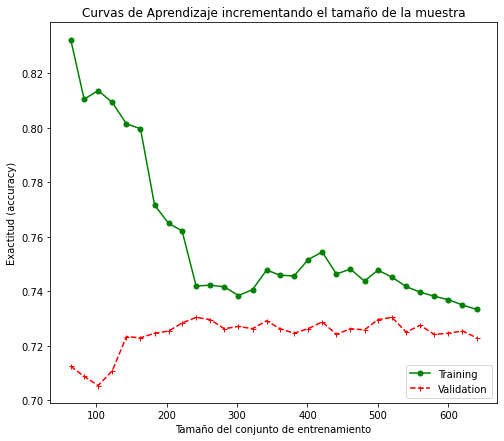

Curva de aprendizaje para el modelo Jobish (tree)


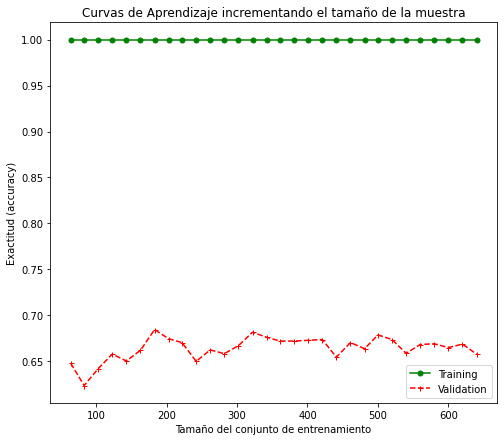

In [ ]:
#Ahora vamos a usar nuestra función para graficar la cruva de aprendizaje para un modelo de regresión logística
#usando la misma validación cruzada (cv) que definimos arriba

for i in range(len(models)):
    print(f"Curva de aprendizaje para el modelo {model_names[i]}")
    plot_learning_curve (models[i], Xtrain, Ytrain, cv)

La interpretación de las curvas te la dejaré a tí. Pero llama la atención la curva de entrenamiento para el modelo del árbol. Siempre está en 100%. Esto es porque no hemos "podado" el árbol y por eso tenemos ese comportamiento. Ahora pasemos a la parte final: buscar los mejores parámetros.

#### **4. Buscando los mejores parámetros**

Para esta sección estaremos haciendo uso de GridSearchCV de sklearn. Para ello, vamos a definir una función que imprima los valores que arroja el método GridSearchCV y haga un par de configuraciones.

In [ ]:
from sklearn.model_selection import GridSearchCV


def do_grid_search(model, X, y, cv, dicc_grid, scoring = 'accuracy'):

    #Nuestro pipe, otra vez
    grid_pipe = Pipeline(steps = [
        ('bumblebee', transformer),
        ('model', model) 
        ])
    
    #Creamos el grid
    grid = GridSearchCV(
        estimator= grid_pipe, cv=cv, 
        param_grid=dicc_grid, scoring=scoring)
    
    #Le entramos los valores. Recuerda que el .ravel() es para evitar un warning
    grid.fit(X, y.values.ravel())
    
    #Imprimimos resultados
    print('Mejor valor de exactitud obtenido con la mejor combinación:', grid.best_score_)
    print('Mejor combinación de valores encontrados de los hiperparámetros:', grid.best_params_)
    print('Métrica utilizada:', grid.scoring)

Veamos que hace la función anterior:

* Definimos nuestro pipe (si, de nuevo. El mismo pipe). Nota que al paso donde colocamos el modelo le llamamos "model". Esto lo vamos a necesitar en un momento.
* Luego creamos nuestro objetivo GridSearchCV y le pasamos el pipe, el validador cruzado (cv), el diccionario con las diferentes combinaciones que queremos probar y la métrica que queremos usar.
* Luego le pasamos los valores de X y y al grid e imprimimos los resultados.


Básicamente lo que el GridSearchCV hace es buscar la mejor combinación de todos los parámetros que has seleccionado. Es algo así como probar la mejor combinación de ingredientes para maximizar el sabor de la comida.

Fíjate que el argumento "scoring" de nuestra función es opcional. Sino le pasas ningún valor, va asumir el 'accuracy' como default. Puedes probar con otras métricas como recall, f1-score, etc.

Ahora usemos nuestra función grid para el modelo de regresión logística

In [ ]:
dicc_grid = {'model__C':np.linspace(0.0001, 100, 10),
             'model__solver':['newton-cg','lbfgs','liblinear','sag','saga']
             }

do_grid_search(models[0], Xtrain, Ytrain, cv, dicc_grid, 'accuracy')

Mejor valor de exactitud obtenido con la mejor combinación: 0.7270833333333333
Mejor combinación de valores encontrados de los hiperparámetros: {'model__C': 11.1112, 'model__solver': 'liblinear'}
Métrica utilizada: accuracy


ahora probemos el grid con algunos parámetros para el modelo de árbol de decisión.

In [ ]:
dicc_grid = {'model__max_depth':np.linspace(1, 100, 10, dtype="int"),
             'model__criterion':['gini','entropy']
             }

do_grid_search(models[1], Xtrain, Ytrain, cv, dicc_grid, 'accuracy')

Mejor valor de exactitud obtenido con la mejor combinación: 0.70375
Mejor combinación de valores encontrados de los hiperparámetros: {'model__criterion': 'gini', 'model__max_depth': 1}
Métrica utilizada: accuracy


Entre los dos el modelo de regresión logística tuvo mejor accuracy si lo configuramos con los siguientes parámetros:

C = 11.11
solver: liblinear

Importante destacar que existen otros hiperparámetros que se pueden probar. Para este tutorial solo vimos dos de cada modelo.

Ahora veamos que fue lo que hicimos:

**Regresión Logística**

Para este modelo probamos dos parámetros: C con 10 valores que van desde 0.0001 hasta 100 y solver con 5 posibles configuraciones.

* El parámetro C se usa para regularizar el modelo y por tanto minimizar el sobreentrenamiento. Mientras más pequeño es C, mayor será la regularización (conviene repasar la práctica de regularización que hicimos con Falcon).
* El parámetro solver define el algoritmo de optimización a utilizar. Esto es como el procedimiento a seguir por el modelo para optimizar el resultado.

**Arbol de decisión**

* El parámetro max_depth define la cantidad máxima de ramas del arbol. Mientras más ramas, mayor posibilidad de sobreentrenamiento (que fue lo que nos pasó en el gráfico de curva de aprendizaje arriba). En este caso estamos probando con 10 posibles valores de ramas máximas.
* el parámetro criterion define que función a utilizar para medir la calidad de la ramificación del árbol. En otras palabras, cada vez que se crea una nueva rama del árbol, esta se hace de manera tal que la función de calidad sea la más óptima (ya sea que se calcule con el gini o con entropy).

Por último, fíjate que al definir el dicc_grid tuvimos que nombrar los parámetros como "model__C". Esto porque estamos usando un pipe y la función GridSearchCV no va a saber en cuál paso del pipe se encuentra el modelo que usará para probar los diferentes hiperparámetros. Por tanto, eso se lo decimos colocando como prefijo el nombre del paso seguido de dos guiones bajos (underscore): model__. Si pusiéramos el modelo directo en el grid, sin usar pipe, el prefijo no sería necesario en el diccionario de los hiperparámetros.

Y hasta aquí llegamos con el tutorial.

Se que fue largo pero espero que te sirva. ¡Suerte!

![long-time](https://github.com/rafaeljosem/tutoriales-mna/blob/main/IA%20%26%20AA/images/memes/longtime-titanic.gif?raw=1)

